In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
tickers = ['TSLA']

In [4]:
TSLA_stock_data = yf.download(tickers, start='2015-01-01', end='2024-10-31')

[*********************100%***********************]  1 of 1 completed


In [5]:
# Display the first few rows of the data
print(TSLA_stock_data.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500


In [6]:
TSLA_stock_data.to_csv('../data/TSLA_stock_data.csv')

In [7]:
# Load the data
data = pd.read_csv('../data/TSLA_stock_data.csv', parse_dates=['Date'], index_col='Date')
data = data['Close']  # Focus on closing prices
data = data.asfreq('B')  # Use business days only
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_8444\886707494.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


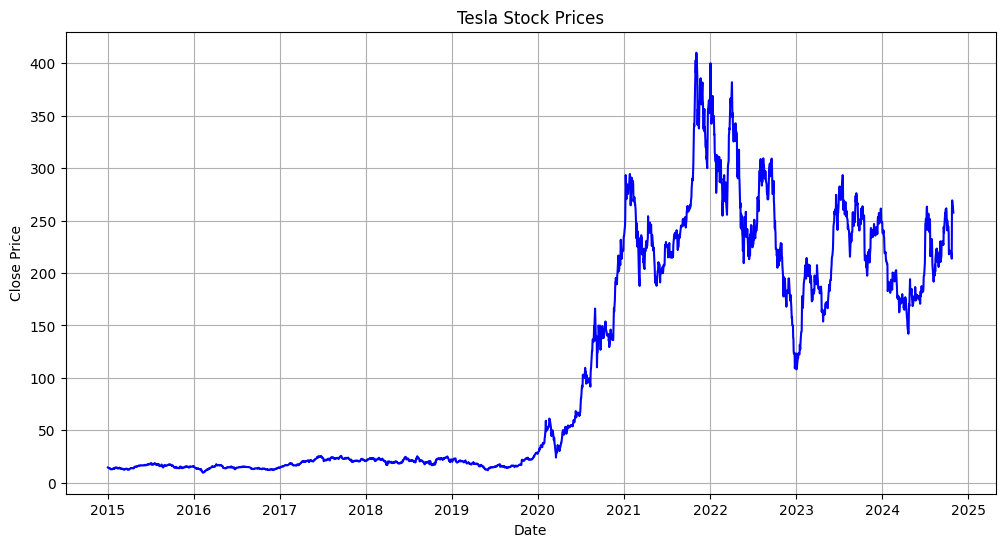

In [9]:
# Plot the Tesla stock prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, color='blue')  # Use data.index for the x-axis
plt.title('Tesla Stock Prices')  # Set the title
plt.xlabel('Date')  # Set x-axis label
plt.ylabel('Close Price')  # Set y-axis label
plt.grid()  # Optional: add a grid for better readability
plt.show()  # Display the plot

In [10]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [11]:
# Fit ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust order as necessary
arima_result = arima_model.fit()

# Forecast
arima_forecast = arima_result.forecast(steps=len(test))

ARIMA RMSE: 40.7551663858897


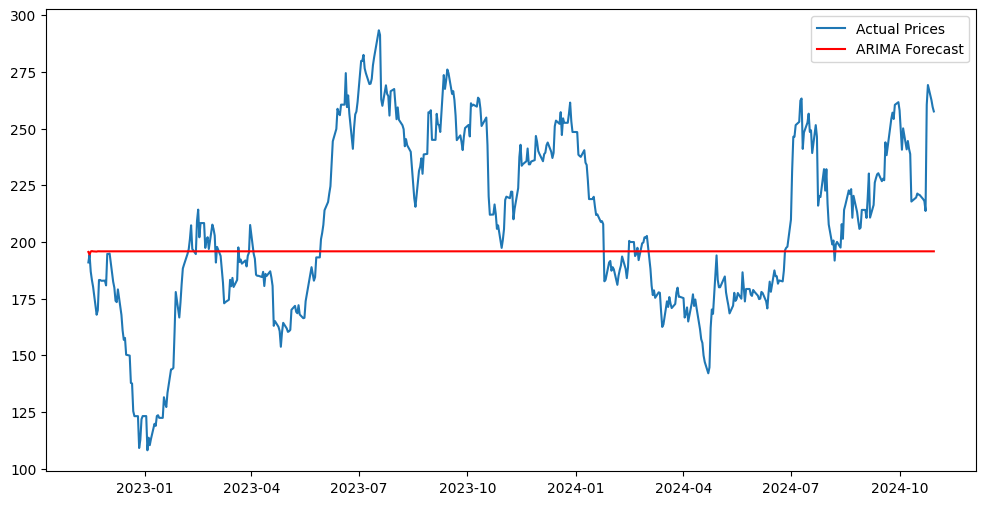

In [12]:
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f'ARIMA RMSE: {arima_rmse}')

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.show()

In [13]:
# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust as necessary
sarima_result = sarima_model.fit()

# Forecast
sarima_forecast = sarima_result.forecast(steps=len(test))

SARIMA RMSE: 37.672653927912016


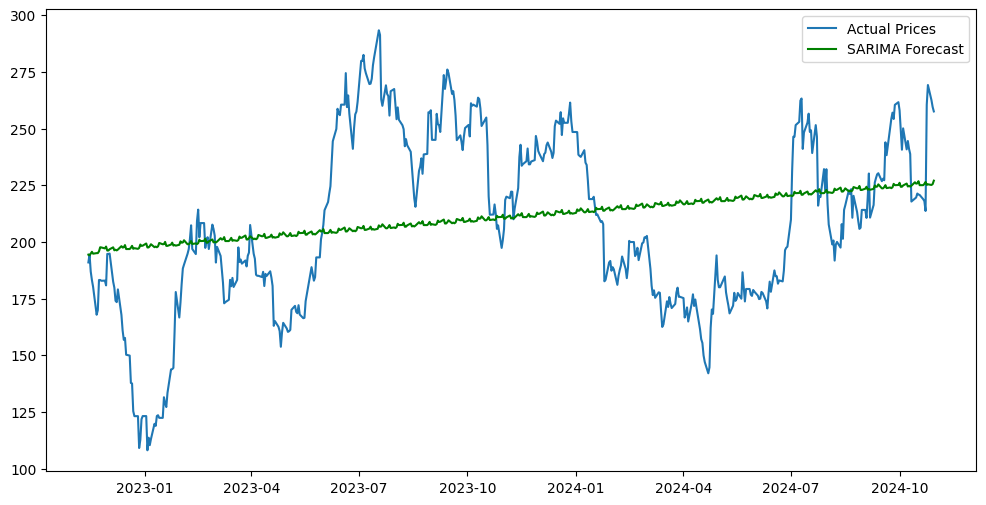

In [14]:
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f'SARIMA RMSE: {sarima_rmse}')

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.show()

In [15]:
print(f'ARIMA RMSE: {arima_rmse}')
print(f'SARIMA RMSE: {sarima_rmse}')

ARIMA RMSE: 40.7551663858897
SARIMA RMSE: 37.672653927912016


In [16]:
print(f'Training size: {len(train)}')
print(f'Testing size: {len(test)}')

Training size: 2051
Testing size: 513


In [17]:
# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust parameters as necessary
sarima_result = sarima_model.fit()

# Display model summary
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2051
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6348.301
Date:                            Mon, 11 Nov 2024   AIC                          12706.602
Time:                                    07:24:56   BIC                          12734.701
Sample:                                01-02-2015   HQIC                         12716.910
                                     - 11-11-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5918      0.158     -3.755      0.000      -0.901      -0.283
ma.L1          0.5544      0.163   

In [18]:
# Forecast
sarima_forecast = sarima_result.forecast(steps=len(test))

SARIMA RMSE: 37.672653927912016


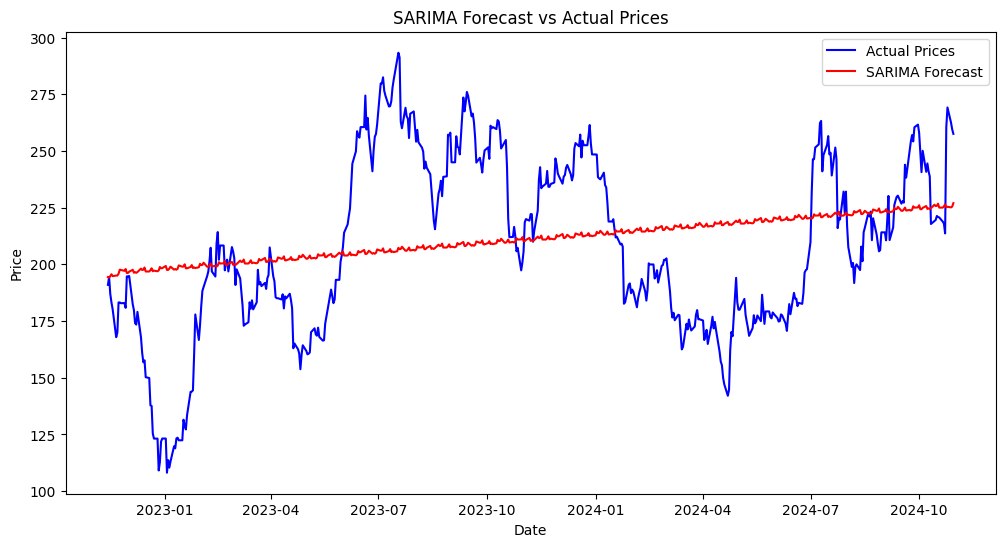

In [19]:
# Calculate RMSE
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f'SARIMA RMSE: {sarima_rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
# Define the number of future days to forecast
future_steps = 30  # Adjust this value as needed

# Create a new SARIMA model with the full dataset
full_model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
full_result = full_model.fit()

# Forecast future stock prices
future_forecast = full_result.forecast(steps=future_steps)

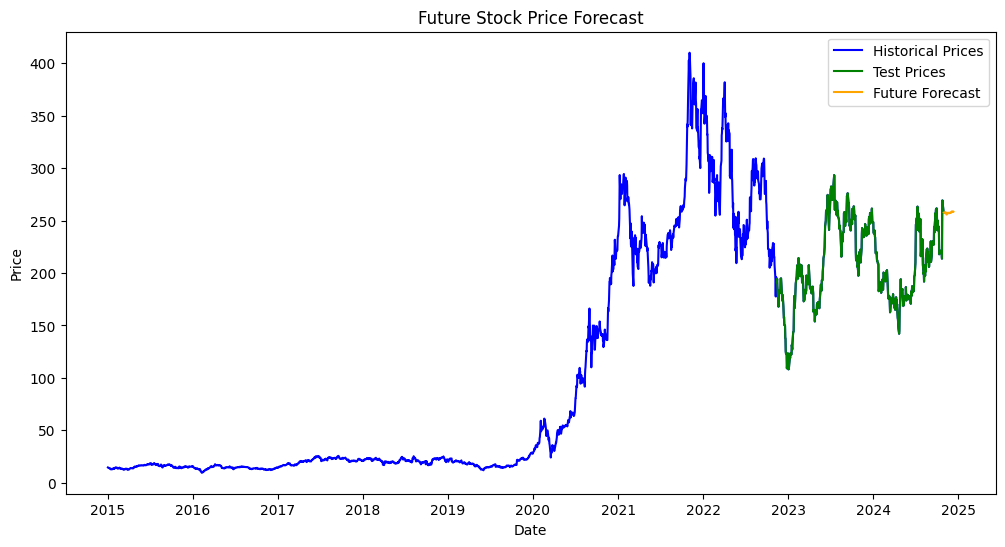

In [21]:

# Create a date range for future predictions
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='B')

# Plot future forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Historical Prices', color='blue')
plt.plot(test.index, test, label='Test Prices', color='green')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='orange')
plt.title('Future Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Optimize SARIMA parameters
model = auto_arima(train, 
                   seasonal=True, 
                   m=12,  # Seasonal period (e.g., 12 for monthly data)
                   trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True)

# Display the best model parameters
print(model.summary())

In [ ]:
# Fit the best SARIMA model
sarima_result = model.fit(train)

In [ ]:
# Forecast the test set
sarima_forecast = sarima_result.predict(n_periods=len(test))

# Calculate RMSE
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f'SARIMA RMSE with optimized parameters: {sarima_rmse}')

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, sarima_forecast, label='Optimized SARIMA Forecast', color='red')
plt.title('Optimized SARIMA Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, sarima_forecast)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - sarima_forecast) / test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error (MAE): 31.54577143827872
Root Mean Squared Error (RMSE): 37.672653927912016
Mean Absolute Percentage Error (MAPE): 16.4212956175254%


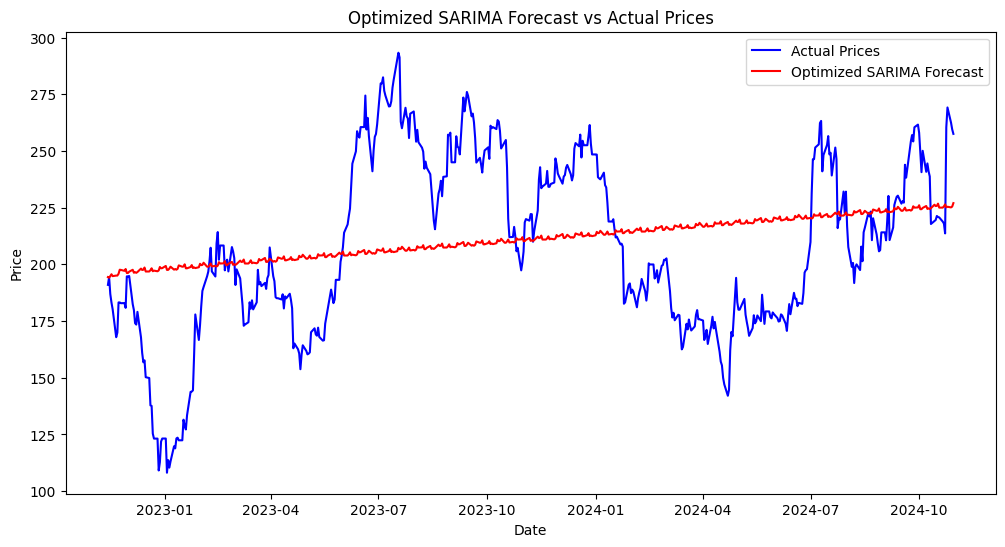

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, sarima_forecast, label='Optimized SARIMA Forecast', color='red')
plt.title('Optimized SARIMA Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()